<a href="https://colab.research.google.com/github/Saimon0007/Multi-label-dataset-plotting/blob/main/plot_random_multilabel_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

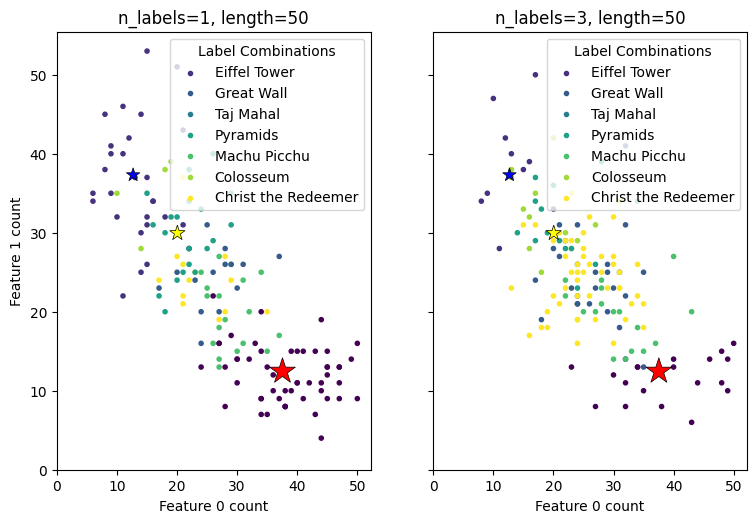

The data was generated from (random_state=192):
Class	P(C)	P(w0|C)	P(w1|C)
red	0.49	0.75	0.25
blue	0.24	0.25	0.75
yellow	0.27	0.40	0.60


In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_multilabel_classification as make_ml_clf
import matplotlib.cm as cm

# Use same random seed for multiple calls to make_multilabel_classification to ensure same distributions
RANDOM_SEED = np.random.randint(2**10)

# Mapping from integer label combination to famous names
name_mapping = {
    0: "Unlabeled",
    1: "Eiffel Tower",  # Label 1
    2: "Great Wall",  # Label 2
    3: "Taj Mahal",  # Label 1 and 2
    4: "Pyramids",  # Label 3
    5: "Machu Picchu",  # Label 1 and 3
    6: "Colosseum",  # Label 2 and 3
    7: "Christ the Redeemer", # Label 1, 2 and 3
}


def plot_2d(ax, n_labels=1, n_classes=3, length=50):
    X, Y, p_c, p_w_c = make_ml_clf(
        n_samples=150,
        n_features=2,
        n_classes=n_classes,
        n_labels=n_labels,
        length=length,
        allow_unlabeled=False,
        return_distributions=True,
        random_state=RANDOM_SEED,
    )

    # Use integer mapping based on label combination for coloring
    label_combinations = (Y * [1, 2, 4]).sum(axis=1)

    # Use a colormap to get colors based on the integer values
    # Updated to use the recommended method for getting colormaps
    cmap = plt.get_cmap('viridis', len(name_mapping))

    scatter = ax.scatter(
        X[:, 0], X[:, 1], c=label_combinations, cmap=cmap, marker="."
    )
    ax.scatter(
        p_w_c[0] * length,
        p_w_c[1] * length,
        marker="*",
        linewidth=0.5,
        edgecolor="black",
        s=20 + 1500 * p_c**2,
        color=['red', 'blue', 'yellow'] # Keep the original colors for the distribution centers
    )
    ax.set_xlabel("Feature 0 count")

    # Create a legend with names
    legend_elements = [plt.scatter([], [], marker='.', color=cmap(i), label=name_mapping[i]) for i in sorted(np.unique(label_combinations))]
    ax.legend(handles=legend_elements, title="Label Combinations")

    return p_c, p_w_c


_, (ax1, ax2) = plt.subplots(1, 2, sharex="row", sharey="row", figsize=(12, 6)) # Increased figure size for legend
plt.subplots_adjust(bottom=0.15, right=0.7) # Adjust layout to make space for legend

p_c, p_w_c = plot_2d(ax1, n_labels=1)
ax1.set_title("n_labels=1, length=50")
ax1.set_ylabel("Feature 1 count")

plot_2d(ax2, n_labels=3)
ax2.set_title("n_labels=3, length=50")
ax2.set_xlim(left=0, auto=True)
ax2.set_ylim(bottom=0, auto=True)


plt.show()

print("The data was generated from (random_state=%d):" % RANDOM_SEED)
print("Class", "P(C)", "P(w0|C)", "P(w1|C)", sep="\t")
for k, p, p_w in zip(["red", "blue", "yellow"], p_c, p_w_c.T):
    print("%s\t%0.2f\t%0.2f\t%0.2f" % (k, p, p_w[0], p_w[1]))